## Pneumonia Detection using CNN
---------------------------
#### Pneumonia?
Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.
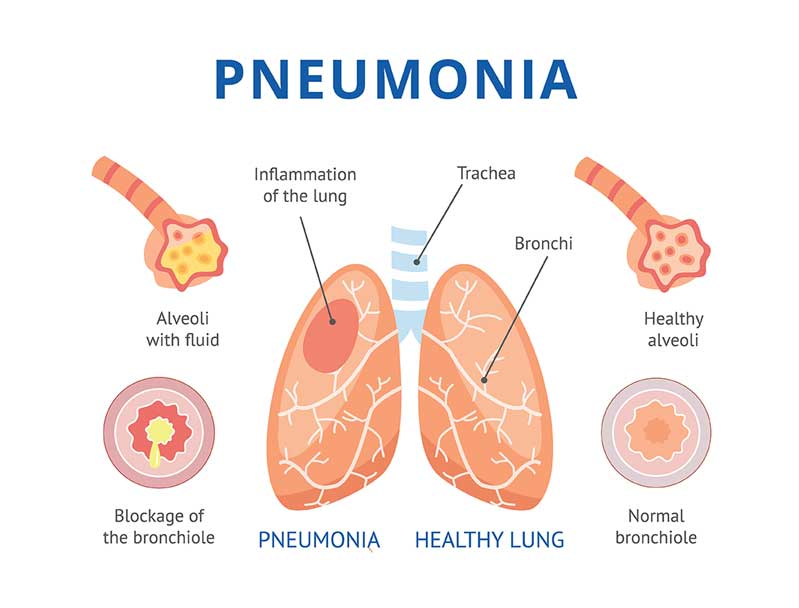

##### Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.



In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from skimage.io import imread
from skimage.io import imshow
import matplotlib.pyplot as plt
import warnings
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [2]:
# Specify the directory path where the training images for normal cases are stored
normal_train_directory = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\train\\NORMAL'

# Get a list of all image filenames in the specified directory
normal_train_images = os.listdir(normal_train_directory)

# Create a list to store the complete file paths for normal training images
normal_train_paths = [os.path.join(normal_train_directory, img) for img in normal_train_images]

# Create a list to store the corresponding labels for normal training images (in this case, 'Normal')
normal_train_label = ['Normal'] * len(normal_train_images)

# Create a DataFrame using pandas, with columns 'image' containing image paths and 'label' containing corresponding labels
normal_train_df = pd.DataFrame({
    'image': normal_train_paths,
    'label': normal_train_label
})

# Display a random sample of 5 rows from the created DataFrame
print(normal_train_df.sample(5))


                                                  image   label
319   D:\Datasets of AB\Pneumonia_Detection\chest_xr...  Normal
739   D:\Datasets of AB\Pneumonia_Detection\chest_xr...  Normal
1319  D:\Datasets of AB\Pneumonia_Detection\chest_xr...  Normal
851   D:\Datasets of AB\Pneumonia_Detection\chest_xr...  Normal
1048  D:\Datasets of AB\Pneumonia_Detection\chest_xr...  Normal


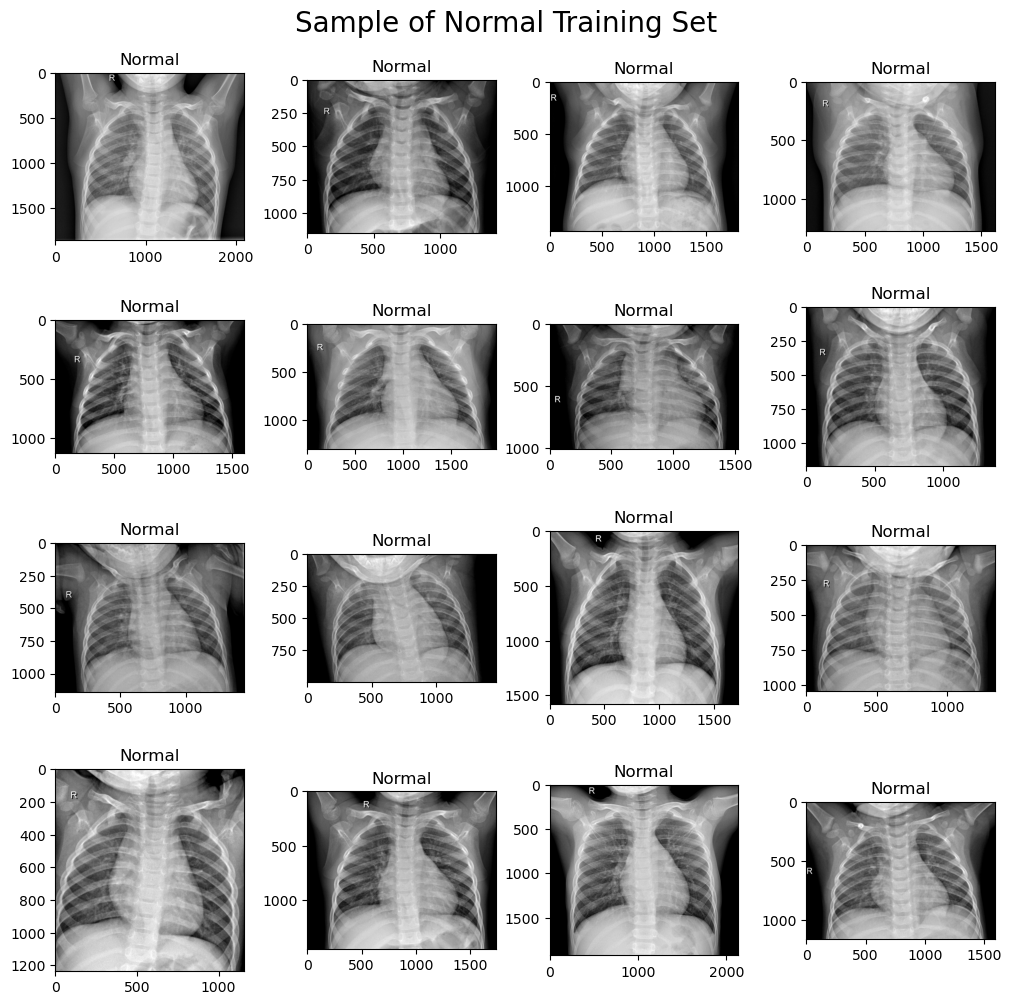

In [4]:
# Create a 4x4 grid of subplots with specified size and constrained layout
fig, ax = plt.subplots(4, 4, figsize=(10, 10), constrained_layout=True)

# Set the title for the entire plot
plt.suptitle('Sample of Normal Training Set', fontsize=20)

# Iterate through each row in the normal_train_df DataFrame
for i, (index, row) in enumerate(normal_train_df.iterrows()):

    # Get the complete file path of the image from the 'image' column
    image_path = row['image']
    
    # Read the image using imread and the full path to the image file
    img = imread(image_path)

    # Flatten the axes array to simplify indexing
    ax = ax.flatten()
    
    # Plot the image in the current subplot
    ax[i].imshow(img, cmap='gray')  # assuming the images are grayscale
    
    # Set the title of the subplot to the corresponding label
    ax[i].set_title(row['label'])
    
    # Break the loop when 16 images have been displayed (4x4 grid)
    if i == 15:
        break

# Display the plot
plt.show()

In [5]:
#Pneumonia train set
# Specify the directory path where the training images for pneumonia cases are stored
pneumonia_train_directory = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\train\\PNEUMONIA'

# Get a list of all image filenames in the specified directory
pneumonia_train_images = os.listdir(pneumonia_train_directory)

# Create a list to store the corresponding labels for pneumonia training images (in this case, 'Pneumonia')
pneumonia_train_label = ['Pneumonia'] * len(pneumonia_train_images)

# Create a DataFrame using pandas, with columns 'image' containing image filenames and 'label' containing corresponding labels
pneumonia_train_df = pd.DataFrame({
    'image': pneumonia_train_images,
    'label': pneumonia_train_label
})

# Display a random sample of 5 rows from the created DataFrame
print(pneumonia_train_df.sample(5))



                             image      label
3197    person62_bacteria_299.jpeg  Pneumonia
2689  person494_bacteria_2088.jpeg  Pneumonia
3531      person7_bacteria_28.jpeg  Pneumonia
1816    person27_bacteria_138.jpeg  Pneumonia
3562     person819_virus_1455.jpeg  Pneumonia


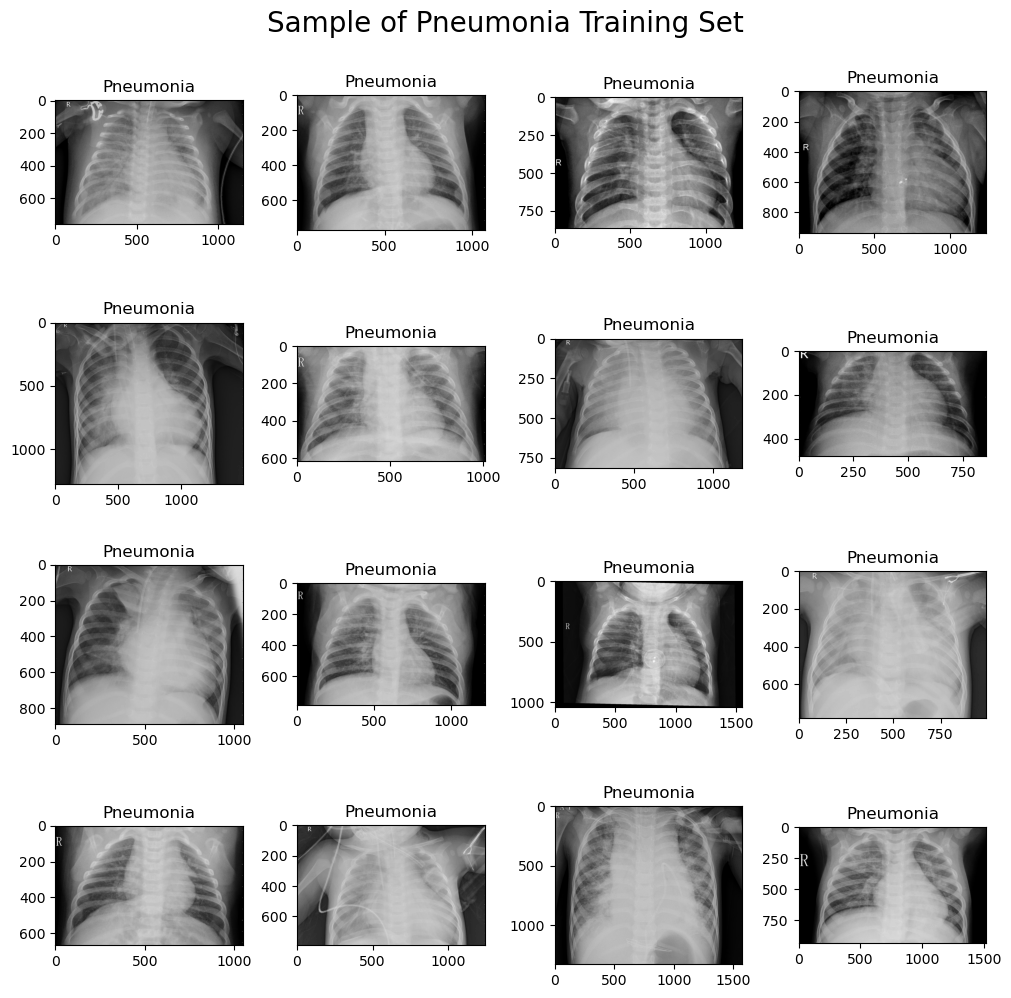

In [6]:
# Create a 4x4 grid of subplots with specified size and constrained layout
fig, ax = plt.subplots(4, 4, figsize=(10, 10), constrained_layout=True)

# Set the title for the entire plot
plt.suptitle('Sample of Pneumonia Training Set', fontsize=20)

# Iterate through each row in the pneumonia_train_df DataFrame
for i, (index, row) in enumerate(pneumonia_train_df.iterrows()):
    
    # Get the complete file path of the image from the 'image' column
    image_path = row['image']
    
    # Read the image using imread and the full path to the image file
    img = imread(os.path.join(pneumonia_train_directory, image_path))

    # Flatten the axes array to simplify indexing
    ax = ax.flatten()
    
    # Plot the image in the current subplot
    ax[i].imshow(img, cmap='gray')  # assuming the images are grayscale
    
    # Set the title of the subplot to the corresponding label
    ax[i].set_title(row['label'])
    
    # Break the loop when 16 images have been displayed (4x4 grid)
    if i == 15:
        break

# Display the plot
plt.show()

In [7]:
print('Total Normal and Pneumonia training set image: ',  
      int(normal_train_df['label'].value_counts().iloc[0]) +  
      int(pneumonia_train_df['label'].value_counts().iloc[0]))

Total Normal and Pneumonia training set image:  5216


Concatenate two DataFrames, 'normal_train_df' and 'pneumonia_train_df', to create a single DataFrame containing data for both normal and pneumonia cases

In [8]:
train_df =  pd.concat([normal_train_df, pneumonia_train_df])

In [9]:
train_df.head()

,image,label
0,D:\Datasets of AB\Pneumonia_Detection\chest_xr...,Normal
1,D:\Datasets of AB\Pneumonia_Detection\chest_xr...,Normal
2,D:\Datasets of AB\Pneumonia_Detection\chest_xr...,Normal
3,D:\Datasets of AB\Pneumonia_Detection\chest_xr...,Normal
4,D:\Datasets of AB\Pneumonia_Detection\chest_xr...,Normal


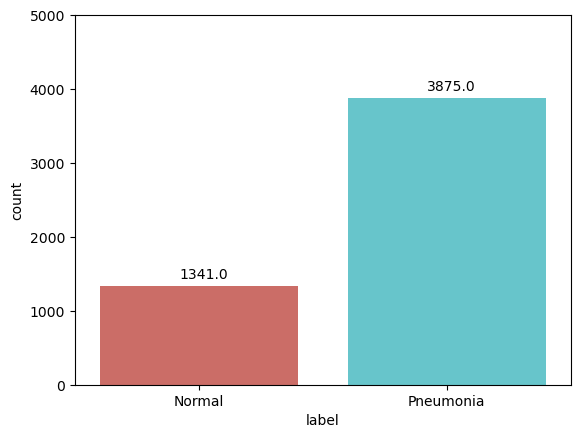

In [10]:
# Ignore FutureWarnings related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Create a count plot using Seaborn
ax = sns.countplot(x="label", data=train_df, palette="hls")

# Set y-axis limit for better visualization
plt.ylim(0, 5000)

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + 0.32, p.get_height() + 100))

# Show the plot
plt.show()


### Test set

In [11]:
# Specify the directory path where the test images for normal cases are stored
normal_test_directory = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\test\\NORMAL'

# Get a list of all image filenames in the specified directory
normal_test_images = os.listdir(normal_test_directory)

# Create a list to store the corresponding labels for normal test images (in this case, 'Normal')
normal_test_label = ['Normal'] * len(normal_test_images)

# Create a DataFrame using pandas, with columns 'image' containing image filenames and 'label' containing corresponding labels
normal_test_df = pd.DataFrame({
    'image': normal_test_images,
    'label': normal_test_label
})

# Display a random sample of 5 rows from the created DataFrame
print(normal_test_df.sample(5))


                         image   label
6            IM-0010-0001.jpeg  Normal
22           IM-0030-0001.jpeg  Normal
171  NORMAL2-IM-0302-0001.jpeg  Normal
202  NORMAL2-IM-0340-0001.jpeg  Normal
212  NORMAL2-IM-0352-0001.jpeg  Normal


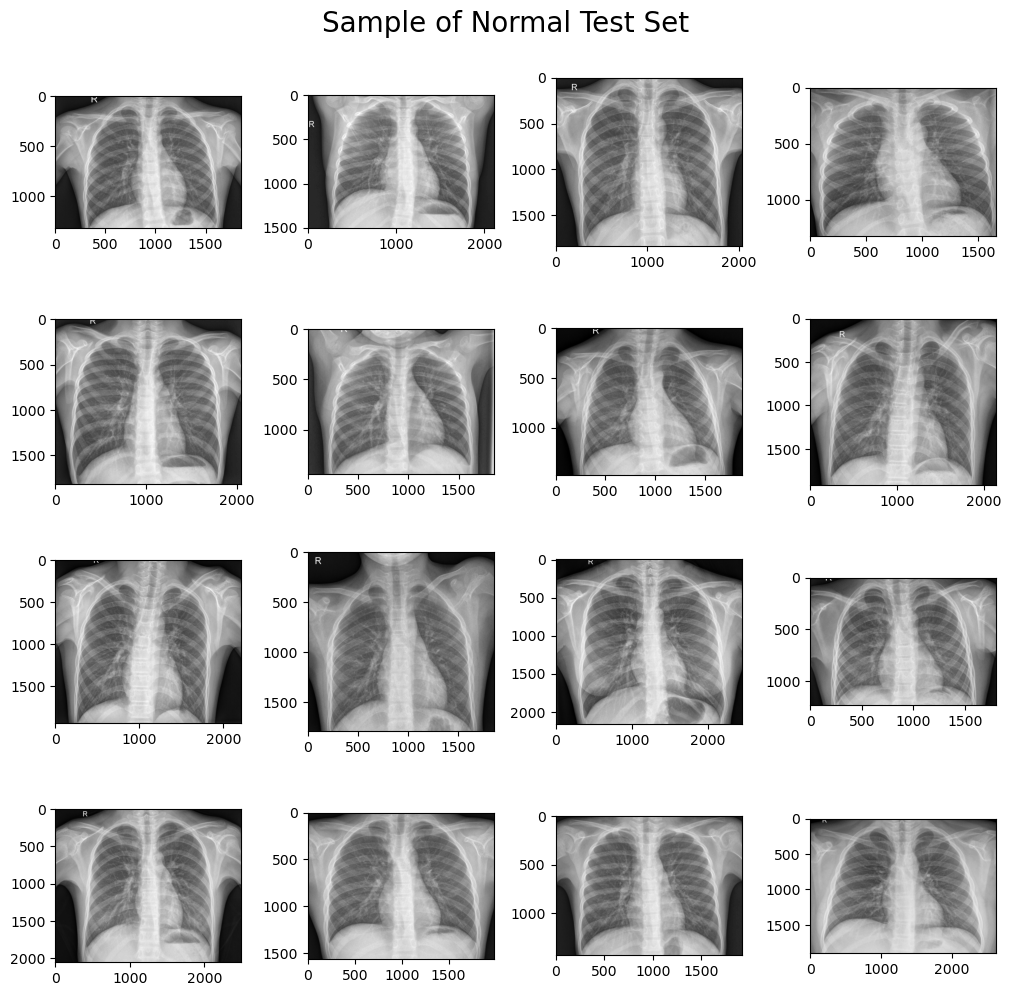

In [12]:
# Specify the directory path where the test images for normal cases are stored
normal_test_directory = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\test\\NORMAL'

# Get a list of all image filenames in the specified directory
normal_test_images = os.listdir(normal_test_directory)

# Create a 4x4 grid of subplots with specified size and constrained layout
fig, ax = plt.subplots(4, 4, figsize=(10, 10), constrained_layout=True)

# Set the title for the entire plot
plt.suptitle('Sample of Normal Test Set', fontsize=20)

# Iterate through each row in the normal_test_df DataFrame
for i, (index, row) in enumerate(normal_test_df.iterrows()):

    # Get the complete file path of the image from the 'image' column
    image_path = os.path.join(normal_test_directory, row['image'])
    
    # Read the image using imread and the full path to the image file
    img = imread(image_path)

    # Flatten the axes array to simplify indexing
    ax = ax.flatten()
    
    # Plot the image in the current subplot
    ax[i].imshow(img, cmap='gray')  # assuming the images are grayscale
    
    # Set the title of the subplot to the image filename (optional)
    # ax[i].set_title(row['image'])
    
    # Break the loop when 16 images have been displayed (4x4 grid)
    if i == 15:
        break

# Display the plot
plt.show()


### Pneumonia train set

In [13]:
# Specify the directory path where the test images for pneumonia cases are stored
pneumonia_test_directory = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\test\\PNEUMONIA'

# Get a list of all image filenames in the specified directory
pneumonia_test_images = os.listdir(pneumonia_test_directory)

# Create a list to store the corresponding labels for pneumonia test images (in this case, 'Pneumonia')
pneumonia_test_label = ['Pneumonia'] * len(pneumonia_test_images)

# Create a DataFrame using pandas, with columns 'image' containing image filenames and 'label' containing corresponding labels
pneumonia_test_df = pd.DataFrame({
    'image': pneumonia_test_images,
    'label': pneumonia_test_label
})

# Display a random sample of 5 rows from the created DataFrame
print(pneumonia_test_df.sample(5))

                           image      label
386   person96_bacteria_466.jpeg  Pneumonia
151  person152_bacteria_721.jpeg  Pneumonia
266       person24_virus_58.jpeg  Pneumonia
212   person1655_virus_2861.jpeg  Pneumonia
307      person60_virus_117.jpeg  Pneumonia


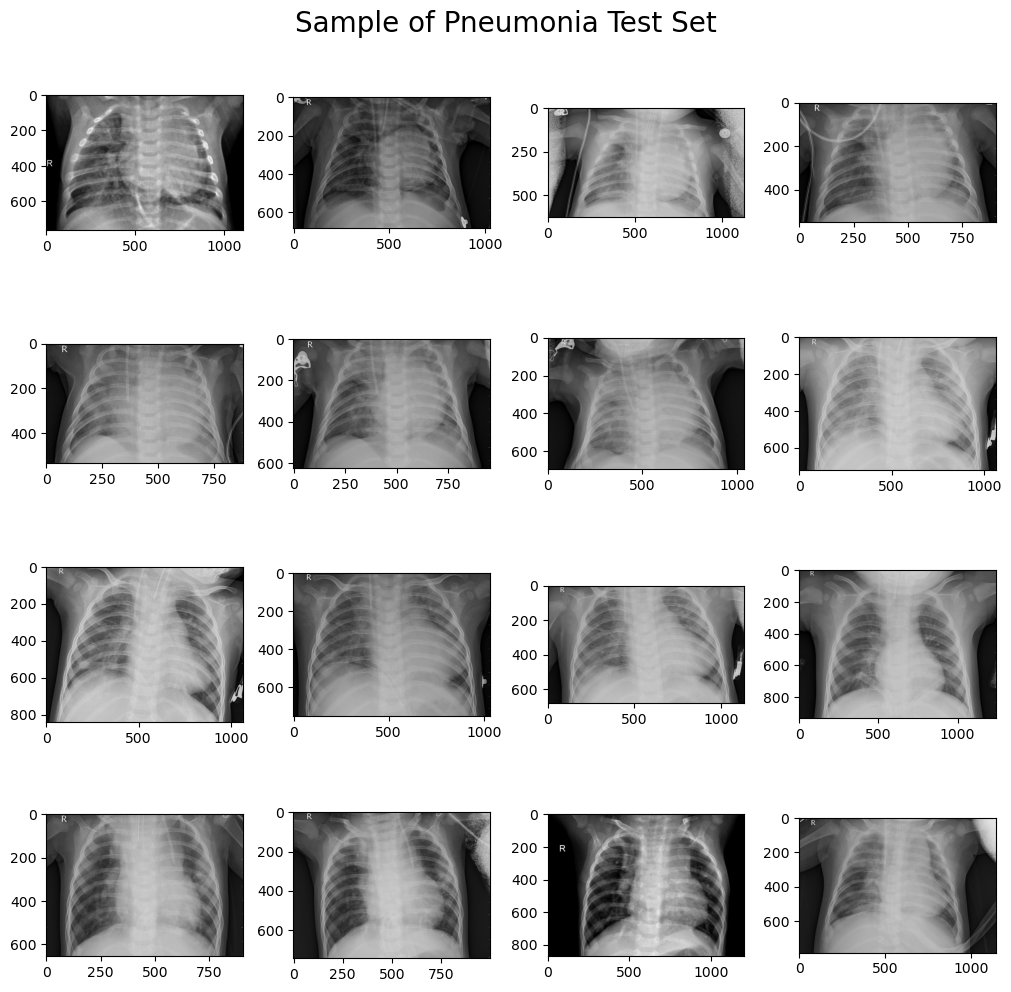

In [14]:
# Specify the directory path where the test images for pneumonia cases are stored
pneumonia_test_directory = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\test\\PNEUMONIA'

# Get a list of all image filenames in the specified directory
pneumonia_test_images = os.listdir(pneumonia_test_directory)

# Create a 4x4 grid of subplots with specified size and constrained layout
fig, ax = plt.subplots(4, 4, figsize=(10, 10), constrained_layout=True)

# Set the title for the entire plot
plt.suptitle('Sample of Pneumonia Test Set', fontsize=20)

# Iterate through each row in the pneumonia_test_df DataFrame
for i, (index, row) in enumerate(pneumonia_test_df.iterrows()):

    # Get the complete file path of the image from the 'image' column
    image_path = os.path.join(pneumonia_test_directory, row['image'])
    
    # Read the image using imread and the full path to the image file
    img = imread(image_path)

    # Flatten the axes array to simplify indexing
    ax = ax.flatten()
    
    # Plot the image in the current subplot
    ax[i].imshow(img, cmap='gray')  # assuming the images are grayscale
    
    # Set the title of the subplot to the image filename (optional)
    # ax[i].set_title(row['image'])
    
    # Break the loop when 16 images have been displayed (4x4 grid)
    if i == 15:
        break

# Display the plot
plt.show()

In [15]:
print('Total Normal and Pneumonia training set image: ',  
      int(normal_test_df['label'].value_counts().iloc[0]) +  
      int(pneumonia_test_df['label'].value_counts().iloc[0]))

Total Normal and Pneumonia training set image:  624


In [16]:
test_df =  pd.concat([normal_test_df, pneumonia_test_df])

In [17]:
test_df.head()

,image,label
0,IM-0001-0001.jpeg,Normal
1,IM-0003-0001.jpeg,Normal
2,IM-0005-0001.jpeg,Normal
3,IM-0006-0001.jpeg,Normal
4,IM-0007-0001.jpeg,Normal


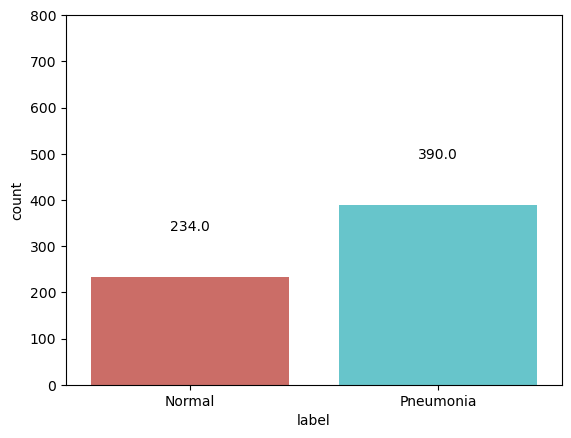

In [18]:
# Ignore FutureWarnings related to is_categorical_dtype
#warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Create a count plot using Seaborn
ax = sns.countplot(x="label", data=test_df, palette="hls")

# Set y-axis limit for better visualization
plt.ylim(0, 800)

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + 0.32, p.get_height() + 100))

# Show the plot
plt.show()

### Preprocess data

In [19]:
# Directory paths for training and validation data
train_dir = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\train'
val_dir = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\test'

# Target image shape after resizing | (WxH)
target_img_shape = (64, 64)

# Create an ImageDataGenerator for augmenting training data
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Rescale pixel values to be in the range [0,1]
    rotation_range=30,              # Random rotation in the range of 0 to 30 degrees
    width_shift_range=0.2,          # Random horizontal shift by up to 20% of the image width
    height_shift_range=0.2,         # Random vertical shift by up to 20% of the image height
    shear_range=0.2,                # Shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,                 # Random zoom in the range of 80% to 120%
    horizontal_flip=True,           # Randomly flip images horizontally
    fill_mode='nearest'             # Strategy for filling in newly created pixels after rotation or width/height shift
)

# Create a flow from the training directory
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_img_shape,   # Resize images to the specified target size
    batch_size=32,                   # Number of images in each batch
    class_mode='binary'              # Binary classification since it's a binary problem (Normal or Pneumonia)
)


Found 5216 images belonging to 2 classes.


In [20]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,  # Resize images to the specified target size
                                            batch_size=32, # Number of images in each batch
                                            class_mode='binary') # Binary classification since it's a binary problem (Normal or Pneumonia)

Found 624 images belonging to 2 classes.


In [21]:
# Print information about the distribution of classes in the training set
print('Training')

# Get unique class IDs and their corresponding counts in the training set
ids, counts = np.unique(train_set.classes, return_counts=True)

# Print the unique class IDs
print('Class IDs:', ids)

# Print the corresponding counts for each class ID
print('Class Counts:', counts)


Training
Class IDs: [0 1]
Class Counts: [1341 3875]


Class 0 (NORMAL) is 1341 and Class 1 (PNEUMONIA) is 3875.

In [22]:
# Get the class labels and their corresponding indices
labels = train_set.class_indices

# Create a dictionary mapping class indices to class labels
labels = dict((v, k) for k, v in labels.items())

# Print the dictionary of class labels
print(labels)

# Iterate through unique class IDs and print the corresponding class labels and counts
for i in ids:
    # Print the class label and its count
    print('{:>6} = {}'.format(labels[i], counts[i]))


{0: 'NORMAL', 1: 'PNEUMONIA'}
NORMAL = 1341
PNEUMONIA = 3875


In [23]:
# Print information about the distribution of classes in the validation set
print('Validation')

# Get unique class IDs and their corresponding counts in the validation set
ids, counts = np.unique(val_set.classes, return_counts=True)

# Print the unique class IDs
print('Class IDs:', ids)

# Print the corresponding counts for each class ID
print('Class Counts:', counts)


Validation
Class IDs: [0 1]
Class Counts: [234 390]


In [24]:
# Get the class labels and their corresponding indices for the training set
labels = train_set.class_indices

# Create a dictionary mapping class indices to class labels for the training set
labels = dict((v, k) for k, v in labels.items())

# Print the dictionary of class labels for the training set
print(labels)

# Iterate through unique class IDs in the training set and print the corresponding class labels and counts
for i in ids:
    # Print the class label and its count for the training set
    print('{:>6} = {}'.format(labels[i], counts[i]))


{0: 'NORMAL', 1: 'PNEUMONIA'}
NORMAL = 234
PNEUMONIA = 390


In [25]:
# Get the counts of classes in the training set
_, train_count = np.unique(train_set.classes, return_counts=True)

# Get the counts of classes in the validation set
_, val_count = np.unique(val_set.classes, return_counts=True)

# Print the ratio of the validation set size to the total dataset size
print('Ratio Validation/Training set:',
      val_count / (train_count + val_count) * 100)


Ratio Validation/Training set: [14.85714286  9.14419695]


The proportion of validation is about 15%.

In [26]:
train_set[0][0][0].shape

(64, 64, 3)

{'NORMAL': 0, 'PNEUMONIA': 1}
Image Batch Shape: (32, 64, 64, 3)
Labels Batch Shape: (32,)


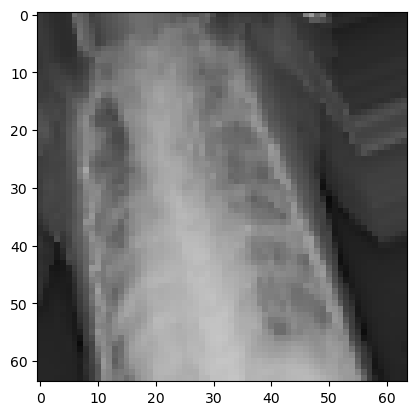

Class Label: 1.0


In [27]:
# Print the class indices for the training set
print(train_set.class_indices)

# Iterate through batches of images and labels from the training set
for image_batch, labels_batch in train_set:
    # Print the shape of the image batch and labels batch
    print('Image Batch Shape:', image_batch.shape)
    print('Labels Batch Shape:', labels_batch.shape)

    # Display the first image in the batch
    plt.imshow(image_batch[0])
    plt.show()

    # Print the class label of the first image in the batch
    print('Class Label:', labels_batch[0])

    # Break the loop after displaying the first batch
    break


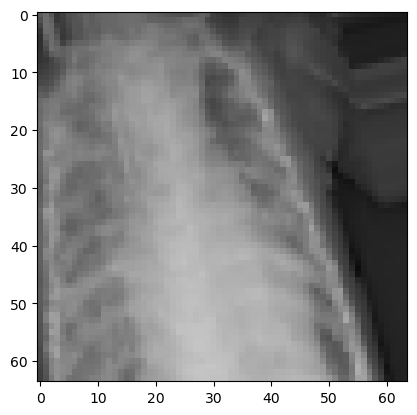

In [28]:
plt.imshow(train_set[0][0][0]) 
plt.show()

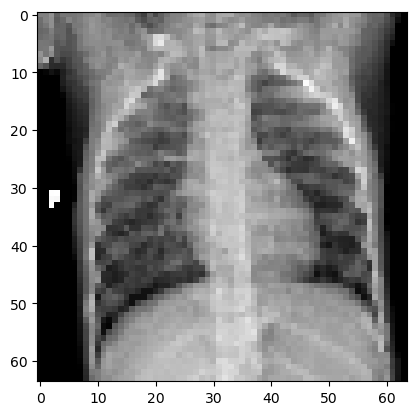

In [29]:
plt.imshow(val_set[0][0][0])
plt.show()

In [30]:
#Image obtained from data augmentation
def plotImages(images_arr):
    """
    Display a row of images.

    Parameters:
    - images_arr: List of images to be displayed.
    """
    # Create a subplot with 1 row and 4 columns, with a specified size
    fig, axes = plt.subplots(1, 4, figsize=(10, 10))

    # Iterate through images and corresponding subplot axes
    for img, ax in zip(images_arr, axes):
        # Display each image in the subplot
        ax.imshow(img)

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()


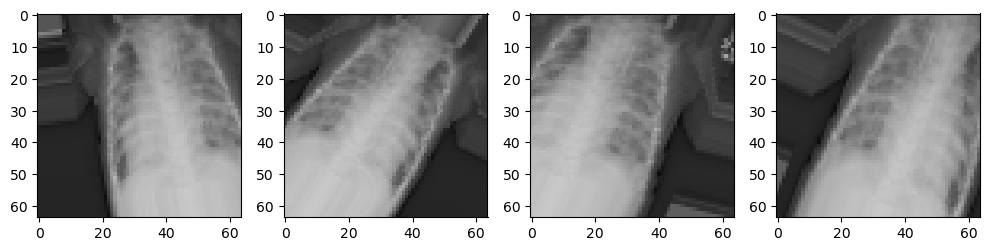

In [31]:
augmented_images = [train_set[0][0][0] for i in range(4)]
plotImages(augmented_images)

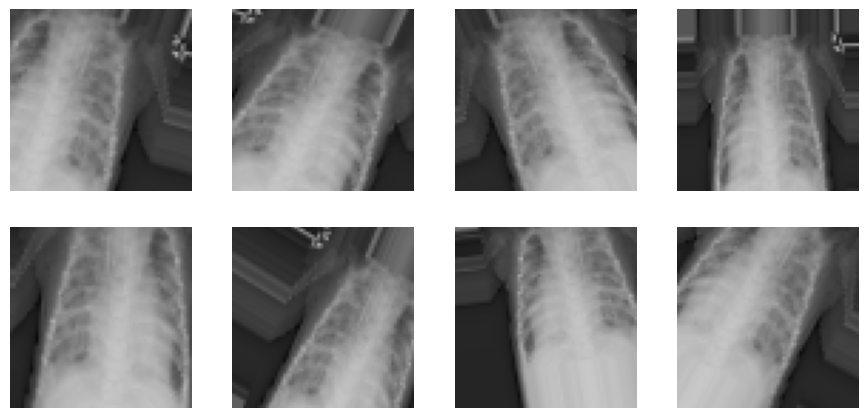

In [32]:
## Number of plots to display
nplots = 8 

## Define a function to visualize multiple images in a grid
def visual_multi(images_arr):
    """
    Display multiple images in a grid.

    Parameters:
    - images_arr: List of images to be displayed.
    """
    # Create a figure with a specified size
    fig = plt.figure(figsize=(11, 8)) 

    # Iterate through images and display them in a grid
    for j in range(nplots):
        # Create a subplot with 3 rows and 4 columns
        plt.subplot(3, 4, j+1)

        # Display each image in the subplot
        plt.imshow(images_arr[j])

        # Turn off axis labels
        plt.axis('off')

    # Show the plot
    plt.show()

# Create a list of augmented images (using the first batch from train_set)
augmented_images = [train_set[0][0][0] for i in range(nplots)]

# Visualize the augmented images
visual_multi(augmented_images)


### Build convolutional neural network 

In [33]:
in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(64, 64, 3)

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D,
Flatten, Dropout, MaxPool2D )

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [37]:
import time
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set),
                     validation_data=val_set,
                    epochs=20,
                    verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
163/163 [==============================] - 93s 566ms/step - loss: 0.4864 - accuracy: 0.7791 - val_loss: 0.4502 - val_accuracy: 0.7724
Epoch 2/20
163/163 [==============================] - 67s 412ms/step - loss: 0.3688 - accuracy: 0.8250 - val_loss: 0.3957 - val_accuracy: 0.8494
Epoch 3/20
163/163 [==============================] - 67s 411ms/step - loss: 0.3067 - accuracy: 0.8633 - val_loss: 0.3479 - val_accuracy: 0.8702
Epoch 4/20
163/163 [==============================] - 68s 420ms/step - loss: 0.2783 - accuracy: 0.8733 - val_loss: 0.3010 - val_accuracy: 0.8974
Epoch 5/20
163/163 [==============================] - 69s 421ms/step - loss: 0.2725 - accuracy: 0.8809 - val_loss: 0.3811 - val_accuracy: 0.8590
Epoch 6/20
163/163 [==============================] - 68s 414ms/step - loss: 0.2467 - accuracy: 0.8976 - val_loss: 0.2855 - val_accuracy: 0.8846
Epoch 7/20
163/163 [==============================] - 67s 412ms/step - loss: 0.2442 - accuracy: 0.8951 - val_loss: 0.3109 - val_ac

#### Accuracy : 93.63%

#### Val_accuracy : 89.42%

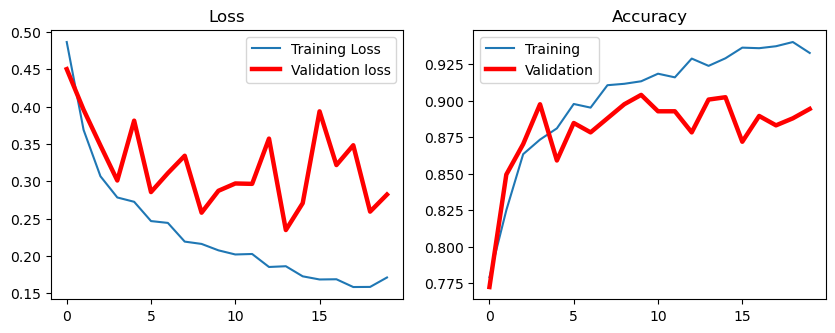

In [38]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

From the train model, it was found that in the early stages of training and validation, loss and accuracy were not very good because it was the first period when the model started learning. After several epochs, you can see that the model has learned in a better way than before. The loss is decreasing, and the accuracy itself is increasing.

In addition, the accuracy values of both training and validation are approximately the same. The last time there was a train accuracy: 0.9371 and a validation accuracy: 0.9087, which means that Model 1 does not overfitting or underfitting.

## Evaluate Model

In [39]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}' .format(acc[1]))

score = 0.894


From the Evaluate Model, the accuracy value is 0.905, which is quite good, but I personally think that in medical work such as this work, there should be a higher accuracy value for more effective diagnosis.

### Try to predict with other photos.
Load image by image

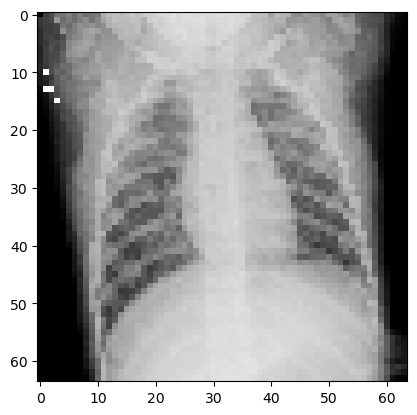

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Target image shape after resizing
target_img_shape = (64, 64)

# File path to the test image
test_image_path = 'D:\\Datasets of AB\\Pneumonia_Detection\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1438-0001.jpeg'

# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=target_img_shape)
test_image = img_to_array(test_image)
test_image /= 255.0  # Normalize pixel values to be in the range [0, 1]

# Display the test image
plt.tight_layout()
plt.imshow(test_image)
plt.show()


In [41]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [42]:
# Predict with the picture above
result = model.predict(test_image)
result

1/1 [==============================] - 0s 190ms/step


array([[0.944014]], dtype=float32)

When an image is submitted, the prediction is given between 0 and 1.

This figure has a probability of 0.91, which is PNEUMONIA.

In [43]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

It's easier to see than above.

In [46]:
if result[0][0] > 0.5:
    predict='PNEUMONIA'
else:
    predict='NORMAL'

print(predict)

PNEUMONIA


In [47]:
cls = 'PNEUMONIA' if result[0][0] > 0.5 else 'NORMAL'
cls

'PNEUMONIA'

#### Load images from the entire folder
There are 16 images to try, including Normal with 8 images and Pneumonia with 8 images (from the Folder Val of this series).

In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_chest_xray(lst):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in lst:

        img = load_img(i, target_size=target_img_shape)
        img = img_to_array(img)
        img /= 255.0


        img_lst.append(img)

        img = np.expand_dims(img, axis=0)

        y_pred_i = model.predict(img)
        y_pred_cls_i = 'PNEUMONIA' if y_pred_i > 0.5 else 'NORMAL' # threshold 0.5

        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

In [49]:
import glob
import os

# Get a list of file paths for chest X-ray images in the validation directory
mylist = [f for f in glob.glob('D:/Datasets of AB/Pneumonia_Detection/chest_xray/val/**/*.jpeg', recursive=True)]

img_lst, y_pred_cls, y_pred = predict_chest_xray(mylist)

# Print the basenames of the images
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 17ms/step
NORMAL2-IM-1427-0001.jpeg | NORMAL2-IM-1430-0001.jpeg | NORMAL2-IM-1431-0001.jpeg | NORMAL2-IM-1436-0001.jpeg | NORMAL2-IM-1437-0001.jpeg | NORMAL2-IM-1438-0001.jpeg | NORMAL2-IM-1440-0001.jpeg | NORMAL2-IM-1442-0001.jpeg | person1946_bacteria_4874.jpeg | person1946_bacteria_4875.jpeg | person1947_bacteria_4876.jpeg | person1949_bacteria_4880.jpeg | person1950_bacteria_4881.jpeg | person1951_bacteria_4882.jpeg | person1952_bacteria_4883.jpeg | person1954_bacteria_4886.jpeg | 

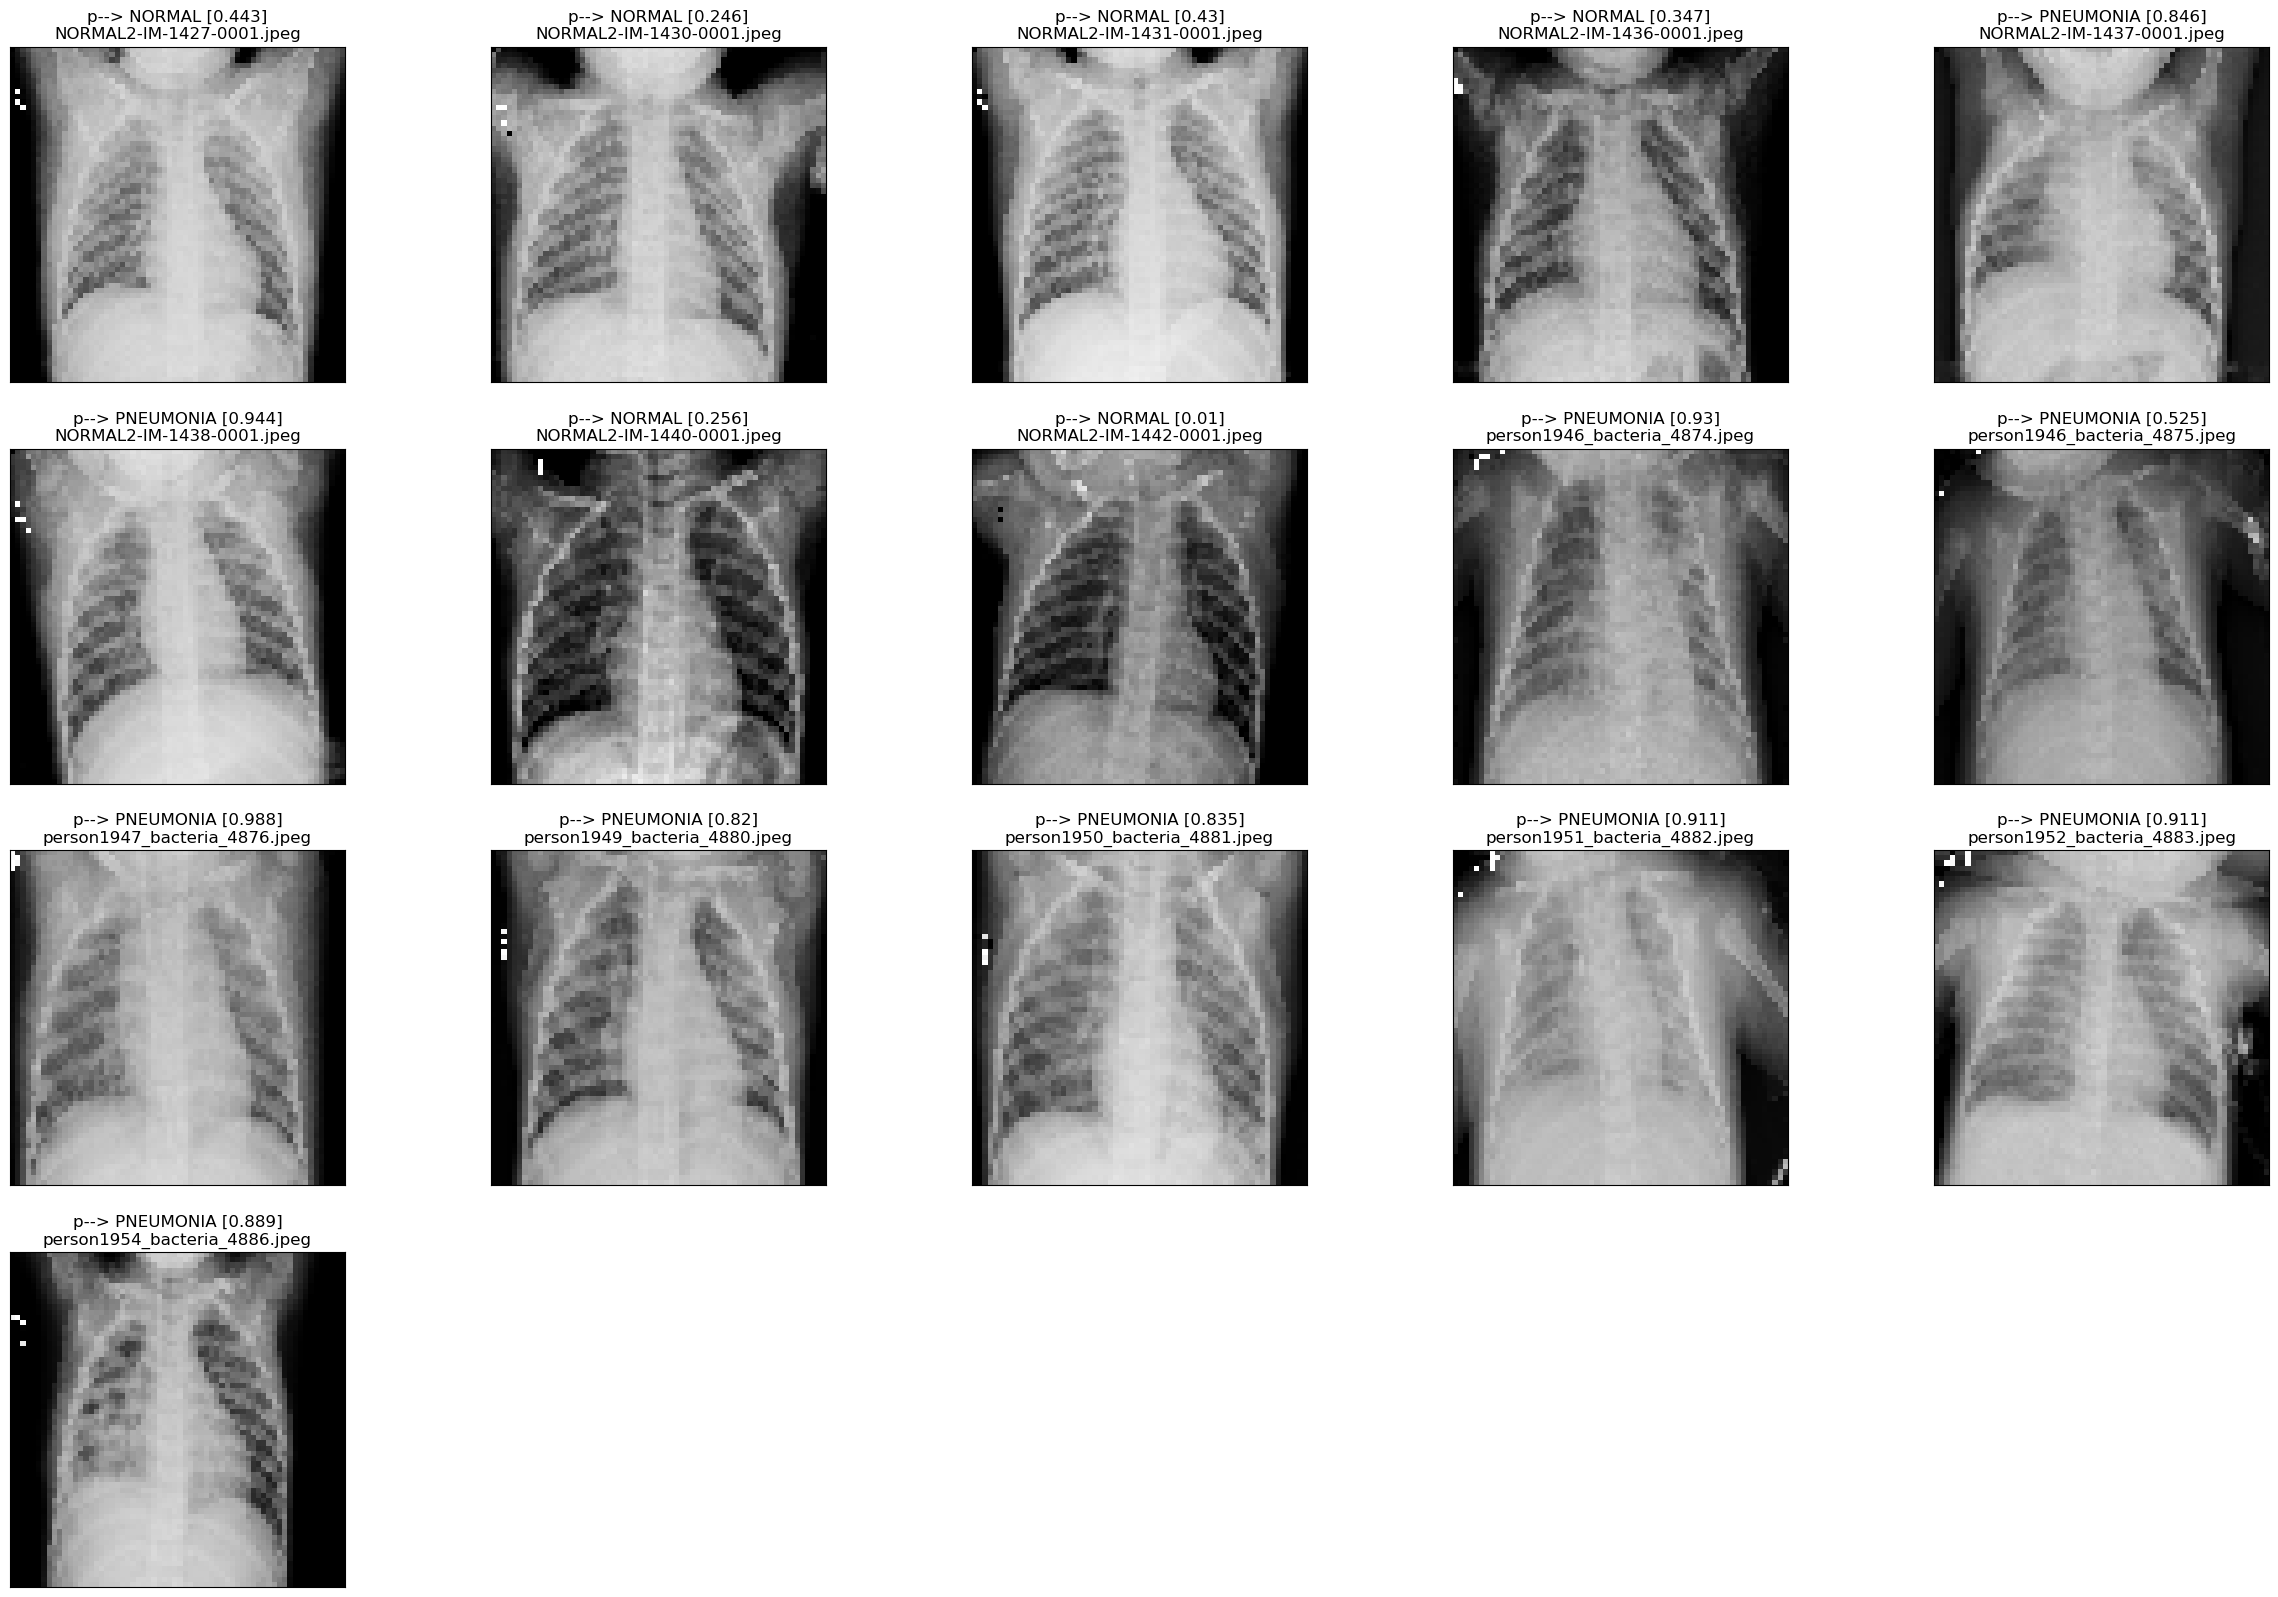

In [50]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

* According to the picture, pneumonia [0.859] is predicted to be pneumonia with a probability of 0.859, where a probability greater than 0.5 indicates pneumonia, while a probability less than 0.5 indicates normal health.
* The prediction model was found to be accurate for all 16 Pneumonia & Normal images that I used.

### Save model

In [51]:
# Save model for further use.
model.save('pneumonia_2nd_2.h5')

### Load model to continue


In [52]:
from keras import models
from keras.models import Sequential, Model

model = models.load_model('C:\\Users\\divak\\100-Days\\pneumonia_2dn_2.h5')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

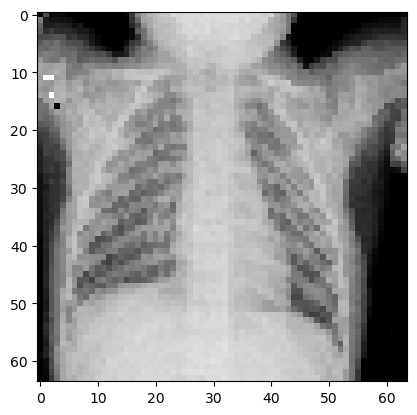

In [56]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape = (64, 64)  # Set the input data size, which must be the same as when creating the model.

#test_image = load_img('PNEUMONIA.png', target_size=target_img_shape)  # Read the image
test_image = load_img('NORMAL.png', target_size=target_img_shape)  # Read the image

test_image = img_to_array(test_image)  # Convert to array
test_image /= 255.0  # Normalize the image

plt.tight_layout()
plt.imshow(test_image)  # Visualize
plt.show()


In [57]:
test_image = np.expand_dims(test_image, axis=0)
# test_image.shape

result = model.predict(test_image)
print(result)

cls = 'PNEUMONIA' if result[0][0] > 0.5 else 'NORMAL'
print(cls)

1/1 [==============================] - 0s 18ms/step
[[0.24595316]]
NORMAL
